In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings("ignore")

In [54]:
 df=pd.read_csv("car_evaluation.csv",encoding = 'utf-8',header = None)

In [55]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [56]:
df.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [57]:
df.columns.tolist()

[0, 1, 2, 3, 4, 5, 6]

In [58]:
df.columns=['0','1','2','3','4','5','6']

In [61]:
df.rename(columns = {'0':'buying','1':'maintainence','2':'doors','3':'persons','4':'lug_boot','5':'safety','6':'class'},inplace = True)

In [62]:
df.head()

,buying,maintainence,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [64]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [66]:
df.dtypes

buying          object
maintainence    object
doors           object
persons         object
lug_boot        object
safety          object
class           object
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maintainence    1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
safety          1728 non-null object
class           1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [70]:
df.nunique()

buying          4
maintainence    4
doors           4
persons         3
lug_boot        3
safety          3
class           4
dtype: int64

In [73]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [75]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [77]:
for i in df.columns:
    print(df[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maintainence, dtype: int64

5more    432
4        432
2        432
3        432
Name: doors, dtype: int64

more    576
4       576
2       576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



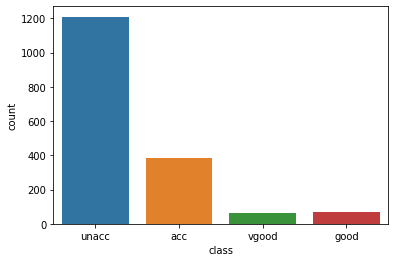

In [80]:
sns.countplot(df['class'])

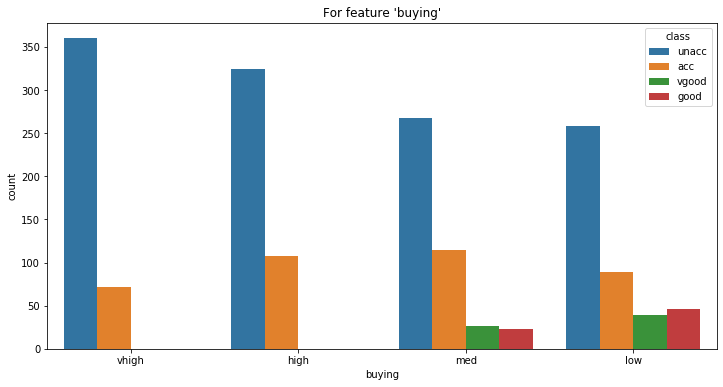

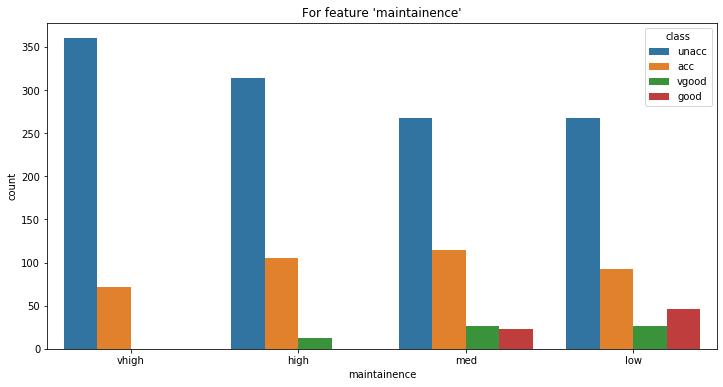

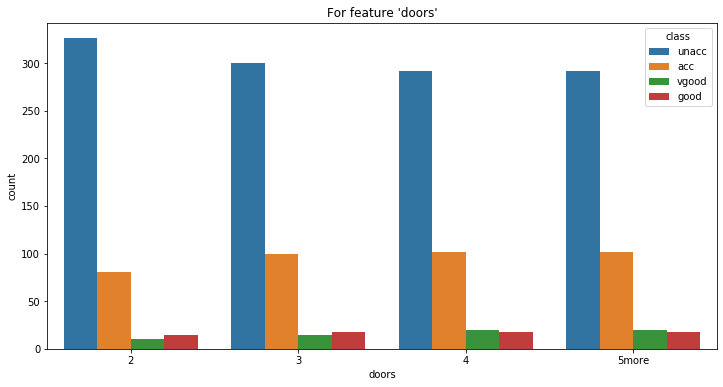

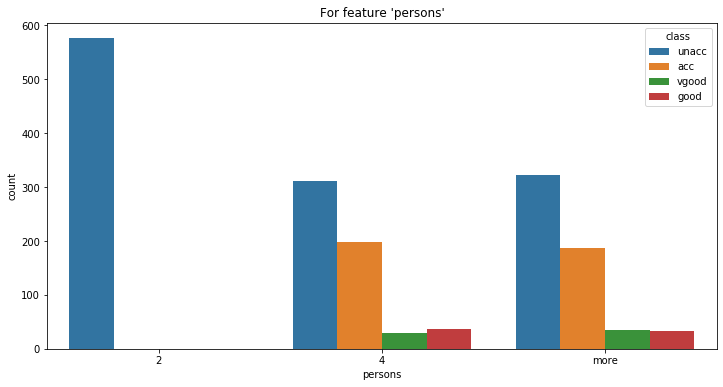

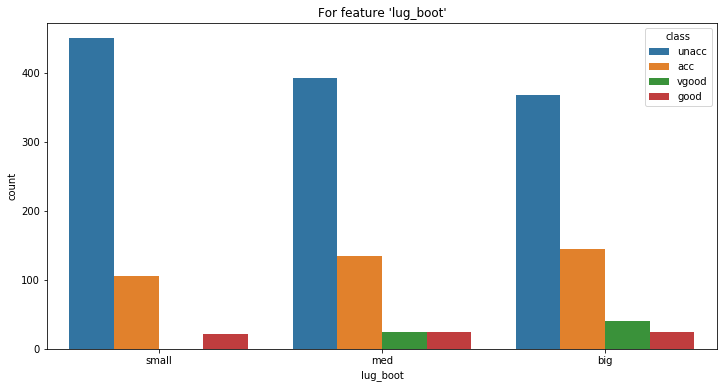

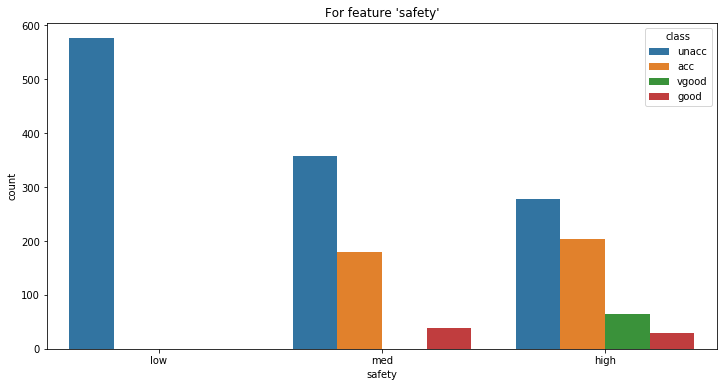

In [82]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(df[i],hue=df['class'])

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
df.head()

,buying,maintainence,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


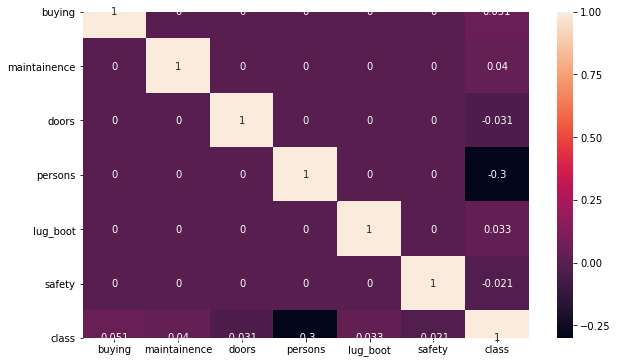

In [84]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [85]:
x=df[df.columns[:-1]]
y=df['class']

In [86]:
x.head()

,buying,maintainence,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [87]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [90]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve,GridSearchCV

In [91]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=10,scoring="r2").mean()

-0.00039112458971775067

In [92]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [93]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
pred=logreg.predict(x_test)

In [95]:
logreg.score(x_test,y_test)

0.6647398843930635

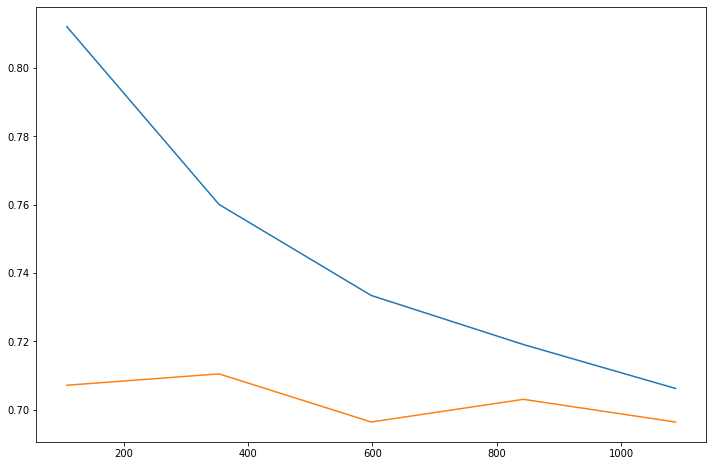

In [97]:
lc=learning_curve(logreg,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [99]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,x_train,y_train,cv=5,param_name='C',param_range=param_range,n_jobs=-1,)
curve

(array([[0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70527404, 0.70423992, 0.70423992, 0.70527404, 0.70454545],
        [0.70837642, 0.71768356, 0.70837642, 0.71354705, 0.7107438 ],
        [0.70527404, 0.71251293, 0.70630817, 0.70527404, 0.70764463]]),
 array([[0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.70247934, 0.70661157, 0.70661157, 0.70247934, 0.70539419],
        [0.73966942, 0.67355372, 0.7107438 , 0.70661157, 0.70124481],
        [0.70247934, 0.66942149, 0.70661157, 0.7107438 , 0.70539419]]))

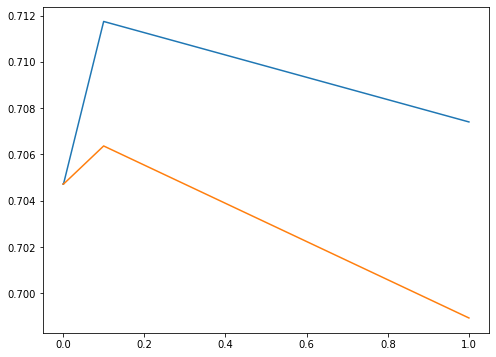

In [100]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [101]:
param_grid={'C':[0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'sag'],'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [103]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [104]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7096807379719489


In [105]:
knn=KNeighborsClassifier(n_jobs=-1)

In [106]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.9017341040462428

In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



In [109]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

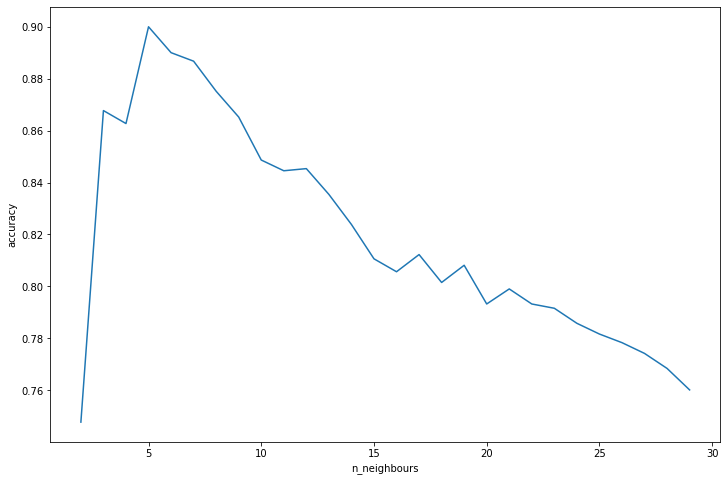

In [110]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 96.72%


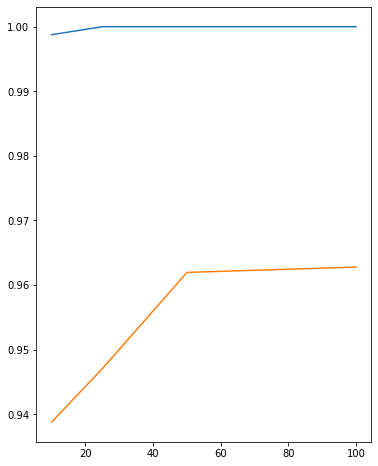

In [116]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,x_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

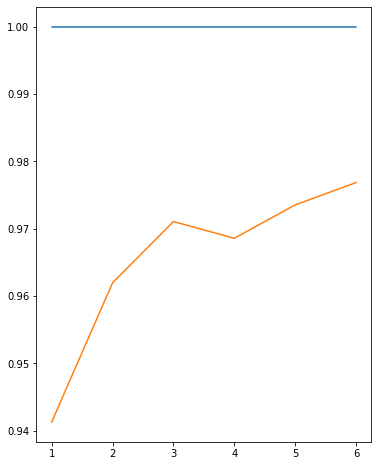

In [118]:
param_range=range(1,len(x.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),x_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [ ]:
from sklearn.externals import joblib
joblib.dump(dt, "dt_baseball.pk1")